# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wohati Damar Thabrani
- **Email:** damarthabrani1228@students.unnes.ac.id
- **ID Dicoding:** wohati_damar

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling laku dan yang paling tidak laku?
- Berapa banyak pesanan yang pengirimannya terlambat? Apakah keterlambatan pengiriman memengaruhi review_score yang diberikan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category_name_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Terdapat 9 dataset yang digunakan
- Setiap dataset kita ubah menjadi dataframe menggunakan library pandas. Kesembilan nama dataframe tersebut antara lain customers_df, geolocation_df, order_items_df, order_payments_df, order_reviews_df, orders_df, product_category_name_df, products_df, sellers_df.

### Assessing Data

#### Menilai dataframe `customers_df`

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak ada nilai null dalam dataframe customers_df
- Tidak ada nilai yang duplikat dalam dataframe customers_df

#### Menilai dataframe `geolocation_df`

In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
print('Jumlah duplikasi: ', geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [20]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Tidak terdapat nilai null dalam dataframe geolocation_df
- Terdapat 261831 data duplikat

#### Menilai dataframe `order_items_df`

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikat: ", order_items_df.duplicated().sum())

Jumlah duplikat:  0


In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ada data duplikat dalam dataframe order_items_df.
- Tidak ada nilai null


#### Menilai dataframe `order_payments_df`

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
print("jumlah duplikat: ", order_payments_df.duplicated().sum())

jumlah duplikat:  0


In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak terdapat nilai null dan data duplikat pada dataframe order_payments_df
- Ada inaccurate value pada kolom payment_sequential

#### Menilai dataframe `order_reviews_df`

In [29]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
print('Jumlah duplikat: ', order_reviews_df.duplicated().sum())

Jumlah duplikat:  0


In [32]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Terdapat nilai null pada kolom review_comment_title dan review_comment_message
- Tidak ada data duplikat

#### Menilai dataframe `orders_df`

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
print("Jumlah duplikat: ", orders_df.duplicated().sum())

Jumlah duplikat:  0


In [36]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat nilai null pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- Tidak ada data duplikat

#### Menilai dataframe `product_category_name_df`

In [37]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
product_category_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
print("Jumlah duplikat: ", product_category_name_df.duplicated().sum())

Jumlah duplikat:  0


In [40]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak terdapat nilai null pada dataframe product_category_name_df
- Tidak ada data duplikat


#### Menilai dataframe `products_df`

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [43]:
print("Jumlah duplikat: ", products_df.duplicated().sum())

Jumlah duplikat:  0


In [44]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat nilai null pada kolom product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- Terdapat inaccurate value pada kolom product_weight_g


#### Menilai dataframe `sellers_df`

In [45]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [47]:
print("Jumlah duplikat: ", sellers_df.duplicated().sum())

Jumlah duplikat:  0


In [48]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak terdapat nilai null
- Tidak terdapat data duplikat

### Cleaning Data

#### Membersihkan dataframe `geolocation_df`

##### Duplicate Data

In [49]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [50]:
geolocation_df.drop_duplicates(inplace=True)

In [51]:
print("Jumlah duplikat: ", geolocation_df.duplicated().sum())

Jumlah duplikat:  0


#### Membersihkan dataframe `order_items_df`

#####Mengubah tipe data kolom price, freight_value, dan shipping_limit_date


In [52]:
order_items_df.price = order_items_df.price.round().astype(int)

In [53]:
order_items_df.freight_value = order_items_df.freight_value.round().astype(int)

In [54]:
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)

In [55]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  int64         
 6   freight_value        112650 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 6.0+ MB


In [56]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,59,13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,240,20
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,18
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13,13
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,200,18


##### Membersihkan dataframe `order_payments_df`

##### Membulatkan nilai pada kolom payment_value menjadi 2 digit setelah koma

In [57]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [58]:
order_payments_df["payment_value"] = round(order_payments_df["payment_value"], 2)

##### Menghapus inaccurate value

In [59]:
index = order_payments_df[order_payments_df.payment_sequential > order_payments_df.payment_installments].index
index

Index([    25,     75,    102,    121,    139,    164,    166,    181,    182,
          209,
       ...
       103499, 103500, 103507, 103520, 103551, 103569, 103732, 103747, 103750,
       103860],
      dtype='int64', length=4312)

In [60]:
order_payments_df.drop(index, axis=0, inplace=True)

In [61]:
index_ = order_payments_df[order_payments_df.payment_value == 0].index
index_

Index([51280, 57411, 94427], dtype='int64')

In [62]:
order_payments_df.drop(index_, axis=0, inplace=True)

In [63]:
order_payments_df[order_payments_df.payment_sequential == order_payments_df.payment_installments].order_id.count()

np.int64(48287)

In [64]:
order_payments_df[order_payments_df.payment_sequential == order_payments_df.payment_installments].order_id.nunique()

48276

In [65]:
order = order_payments_df[order_payments_df.payment_sequential == order_payments_df.payment_installments]
order_index = order[order.duplicated(subset="order_id", keep='first')].index
order_index


Index([39085, 42423, 60380, 78274, 80464, 87711, 91432, 93246, 96276, 100002,
       103817],
      dtype='int64')

In [66]:
order_payments_df.drop(order_index, axis=0, inplace=True)

##### Membersihkan dataframe `order_reviews_df`

##### Mengubah tipe data

In [67]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [68]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [69]:
order_reviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


##### Duplicate Data

In [70]:
order_reviews_df.review_id.is_unique

False

In [71]:
index = order_reviews_df[order_reviews_df.review_id.duplicated(keep='first')].index
index

Index([ 3317,  5719,  7213,  7805,  9013,  9387,  9874, 10112, 10117, 10852,
       ...
       98660, 98740, 98887, 98989, 99085, 99108, 99124, 99164, 99167, 99178],
      dtype='int64', length=814)

In [72]:
order_reviews_df.drop(index, axis=0, inplace=True)

In [73]:
order_reviews_df.order_id.is_unique

False

In [74]:
index = order_reviews_df[order_reviews_df.order_id.duplicated(keep='first')].index
index

Index([ 1119,  3109,  8108,  9064,  9795, 10575, 11139, 11807, 12594, 14893,
       ...
       95931, 96241, 96368, 96552, 96914, 97369, 98048, 98495, 98654, 99199],
      dtype='int64', length=243)

In [75]:
order_reviews_df.drop(index, axis=0, inplace=True)

##### Membersihkan dataframe `orders_df`

##### Missing Values

In [76]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [77]:
order = orders_df[orders_df.order_approved_at.isna()].index
order

Index([ 1130,  1801,  1868,  2029,  2161,  3056,  3094,  3684,  4373,  4939,
       ...
       93992, 94252, 95451, 96996, 97100, 97696, 98415, 98909, 99283, 99347],
      dtype='int64', length=160)

In [78]:
orders_df.drop(order, axis=0, inplace=True)

In [79]:
order_ = orders_df[orders_df.order_delivered_carrier_date.isna()].index
order_

Index([    6,   103,   128,   266,   324,   397,   455,   586,   687,   737,
       ...
       99051, 99066, 99140, 99143, 99147, 99233, 99252, 99313, 99348, 99415],
      dtype='int64', length=1637)

In [80]:
orders_df.drop(order_, axis=0, inplace=True)

In [81]:
orderr = orders_df[orders_df.order_delivered_customer_date.isna()].index
orderr

Index([   44,   154,   162,   231,   299,   305,   333,   374,   430,   444,
       ...
       98170, 98390, 98392, 98397, 98398, 98534, 98779, 98932, 99113, 99181],
      dtype='int64', length=1183)

In [82]:
orders_df.drop(orderr, axis=0, inplace=True)

##### Mengubah tipe data

In [83]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [84]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [85]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


##### Membersihkan dataframe `products_df`

##### Missing Values

In [86]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [87]:
index_ = products_df[products_df.product_weight_g.isna()].index
index_

Index([8578, 18851], dtype='int64')

In [88]:
products_df.drop(index_, axis=0, inplace=True)

In [89]:
index = products_df[products_df.product_category_name.isna()].index
index

Index([  105,   128,   145,   154,   197,   244,   294,   299,   347,   428,
       ...
       32446, 32458, 32460, 32476, 32487, 32515, 32589, 32616, 32772, 32852],
      dtype='int64', length=609)

In [90]:
products_df.drop(index, axis=0, inplace=True)

In [91]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Inaccurate Value

In [92]:
index = products_df[products_df.product_weight_g == 0].index
index

Index([9769, 13683, 14997, 32079], dtype='int64')

In [93]:
products_df.drop(index, axis=0, inplace=True)

In [94]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Mengubah Tipe Data

In [95]:
int_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm" ]

for column in int_columns:
  products_df[column] = products_df[column].astype(int)

## Exploratory Data Analysis (EDA)

### Explore `Sellers_df`

In [96]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [97]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [98]:
sellers_df.seller_id.is_unique

True

In [99]:
sellers_df.groupby(by="seller_city").seller_id.count().sort_values(ascending=False).reset_index().rename(columns={"seller_id": "jumlah seller"})

,seller_city,jumlah seller
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,aguas claras df,1
607,ao bernardo do campo,1
608,angra dos reis rj,1
609,vitoria de santo antao,1


In [100]:
sellers_df.groupby(by="seller_state").seller_id.count().sort_values(ascending=False).reset_index().rename(columns={"seller_id": "jumlah seller"})

,seller_state,jumlah seller
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


In [101]:
sellers_df.groupby(by="seller_zip_code_prefix").seller_id.count().sort_values(ascending=False).reset_index().rename(columns={"seller_id": "jumlah seller"})

,seller_zip_code_prefix,jumlah seller
0,14940,49
1,13660,10
2,16200,9
3,13920,9
4,1026,8
...,...,...
2241,97050,1
2242,96816,1
2243,96530,1
2244,96503,1


**Insight**
- Mengelompokkan seller berdasarkan kota dan mengurutkan kota dengan seller terbanyak
- Mengelompokkan seller berdasarkan state dan mengurutkan state dengan seller terbanyak
- Mengelompokkan seller berdasarkan zip code dan mengurutkan zip code dengan seller terbanyak

### Explore `order_items_df`

In [102]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,59,13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,240,20
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,18
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13,13
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,200,18
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,300,43
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,37
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,100,17
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,56,9


In [103]:
order_items_df.order_id.is_unique

False

In [104]:
order_items_df.product_id.is_unique

False

In [105]:
order_items_df["total_price"] = order_items_df["price"] + order_items_df["freight_value"]

In [106]:
most_expensive_product = order_items_df.sort_values(by="total_price", ascending=False).head()
most_expensive_product[["product_id", "total_price"]]

,product_id,total_price
3556,489ae2aa008f021502940f251d4cce7f,6929
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6922
107841,1bdf5e6731585cf01aa8169c7028d6ad,6727
74336,a6492cc69376c469ab6f61d8f44de961,4950
11249,c3ed642d592594bb648ff4a04cee2747,4764


**Insight**
- Membuat kolom baru yaitu total price berdasarkan penjumlahan kolom price dan freight_value
- Mengurutkan 5 produk dengan harga total paling besar

### Explore `sellers_df & order_items_df`

In [107]:
sellers_order_items_df = pd.merge(
    left=sellers_df,
    right=order_items_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

sellers_order_items_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,total_price
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106,10,116
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,102,16,118
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,11,2,13
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,90,45,135
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,200,22,222
...,...,...,...,...,...,...,...,...,...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27,16,43
112646,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27,11,38
112647,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27,16,43
112648,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,d1edb80f6670902ebbb11765b96873da,1,e891d4a9622cae3b9fc2ec558bda155b,2017-06-26 17:30:16,27,12,39


In [108]:
sellers_order_items_df.groupby(by="seller_id").product_id.count().reset_index().sort_values(by="product_id", ascending=False).head().rename(columns={"product_id": "produk terjual"})

,seller_id,produk terjual
1235,6560211a19b47992c3666cc44a7e94c0,2033
881,4a3ca9315b744ce9f8e9374361493884,1987
368,1f50f920176fa81dab994f9023523100,1931
2481,cc419e0650a3c5ba77189a1882b7556a,1775
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551


In [109]:
sellers_order_items_df.groupby(by="seller_id").total_price.sum().reset_index().sort_values(by="total_price", ascending=False).head().rename(columns={"total_price": "pendapatan kotor"})

,seller_id,pendapatan kotor
857,4869f7a5dfa277a7dca6462dcf3b52b2,249736
1535,7c67e1448b00f6e969d365cea6b010ab,239620
1013,53243585a1d6dc2643021fd1853d8905,235873
881,4a3ca9315b744ce9f8e9374361493884,235655
3024,fa1c13f2614d7b5c4749cbc52fecda94,204123


**Insight**
- Mengurutkan 5 seller/penjual yang paling laris
- Mengurutkan 5 seller/penjual dengan pendapatan kotor terbanyak

### Explore `orders_df`

In [110]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [111]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [112]:
orders_df.order_id.is_unique

True

In [113]:
orders_df.groupby(by="order_status").order_id.count().reset_index().rename(columns={"order_id": "jumlah pesanan"})

,order_status,jumlah pesanan
0,canceled,6
1,delivered,96455


In [114]:
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].dt.date

In [115]:
index = orders_df[orders_df.order_delivered_customer_date > orders_df.order_estimated_delivery_date]
index = np.array([index["order_id"]])

In [116]:
orders_df["ketepatan_waktu"] = orders_df["order_id"].apply(lambda x: "Terlambat" if x in index else "Tepat waktu")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17,2017-03-28,Tepat waktu
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu


In [117]:
order_plot = orders_df.groupby(by="ketepatan_waktu").order_id.count().reset_index().rename(columns={"order_id": "jumlah pesanan"})
order_plot.rename(columns={"jumlah pesanan": "jumlah_pesanan"}, inplace=True)
order_plot

,ketepatan_waktu,jumlah_pesanan
0,Tepat waktu,89927
1,Terlambat,6534


In [118]:
orders_df["order_purchase_timestamp"] = orders_df["order_purchase_timestamp"].dt.date

In [119]:
orders_df["waktu_pengantaran(hari)"] = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
orders_df["waktu_pengantaran(hari)"] = orders_df["waktu_pengantaran(hari)"].apply(lambda x: x.days)

In [120]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17,2017-03-28,Tepat waktu,8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17


In [121]:
orders_df["waktu_pengantaran(hari)"].min()

np.int64(0)

In [122]:
orders_df["waktu_pengantaran(hari)"].max()

np.int64(210)

In [123]:
orders_df["waktu_pengantaran(hari)"].mean()

np.float64(12.496791449394056)

**Insight**
- Menghitung jumlah pesanan yang dicancel dan yang berhasil dikirim
- Menambahkan kolom ketepatan_waktu untuk mengetahui apakah pesanan dikirim tepat waktu atau terlambat
- Menghitung jumlah pesanan yang tepat waktu dan yang terlambat
- Menambahkan kolom waktu_pengantaran(hari) untuk mengetahui berapa lama pesanan diterima pelanggan sejak pesanan dibuat
- Menghitung waktu pengantaran paling cepat, paling lambat, dan rata-rata waktu pengantaran semua pesanan

### Explore `orders_df & order_reviews_df`

In [124]:
order_reviews_orders_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

order_reviews_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95350,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17,2017-03-28,Tepat waktu,8,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22,2017-03-23 11:02:08
95351,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
95352,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
95353,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


In [125]:
order_plot = order_reviews_orders_df.groupby(by="ketepatan_waktu").order_id.count().reset_index().rename(columns={"order_id": "jumlah pesanan"})
order_plot.rename(columns={"jumlah pesanan": "jumlah_pesanan"}, inplace=True)
order_plot

,ketepatan_waktu,jumlah_pesanan
0,Tepat waktu,89009
1,Terlambat,6346


In [126]:
order_mean_plot = order_reviews_orders_df.groupby(by="ketepatan_waktu").review_score.mean().reset_index().rename(columns={"review_score": "rata_rata_rating"})
order_mean_plot["rata_rata_rating"] = round(order_mean_plot["rata_rata_rating"], 1)
order_mean_plot

,ketepatan_waktu,rata_rata_rating
0,Tepat waktu,4.3
1,Terlambat,2.3


**Insight**
- Mencari tahu apakah ketepatan_waktu memengaruhi rating
- Pesanan yang diantar tepat waktu memiliki rata-rata rating 4.3 sedangkan pesanan yang terlambat memiliki rata-rata rating 2.3. Hal ini berarti ketepatan waktu pengantaran pesanan memengaruhi rating yang diberikan customer

### Explore `orders_df & order_items_df`

In [127]:
orders_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,30,9,39
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,119,23,142
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,160,19,179
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45,27,72
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,20,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,175,20,195
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,206,65,271
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,180,41,221
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,180,41,221


In [128]:
orders_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  object        
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  object        
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   ketepatan_waktu                110180 non-null  object        
 9   waktu_pengantaran(hari)        110180 non-null  int64         
 10  order_item_id                  110180 non-null  int64         
 11  

In [129]:
orders_order_items_df.groupby(by="order_id").product_id.count().sort_values(ascending=False).reset_index().rename(columns={"product_id": "jumlah produk"}).head()

,order_id,jumlah produk
0,8272b63d03f5f79c56e9e4120aec44ef,21
1,1b15974a0141d54e36626dca3fdc731a,20
2,ab14fdcfbe524636d65ee38360e22ce8,20
3,428a2f660dc84138d969ccd69a0ab6d5,15
4,9ef13efd6949e4573a18964dd1bbe7f5,15


In [130]:
orders_order_items_df.groupby(by="order_id").total_price.sum().sort_values(ascending=False).reset_index().head()

,order_id,total_price
0,03caa2c082116e1d31e67e9ae3700499,13664
1,736e1922ae60d0d6a89247b851902527,7276
2,0812eb902a67711a1cb742b3cdaa65ae,6929
3,fefacc66af859508bf1a7934eab1e97f,6922
4,f5136e38d1a14a4dbd87dff67da82701,6727


**Insight**
- Mengurutkan 5 pesanan dengan jumlah produk terbanyak
- Megurutkan 5 pesanan dengan total harga paling besar

### Explore `products_df`

In [131]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20


In [132]:
products_df.product_id.is_unique

True

In [133]:
products_df.product_category_name.is_unique

False

In [134]:
products_df.product_category_name.nunique()

73

In [135]:
products_df.groupby(by="product_category_name").product_id.count().sort_values(ascending=False).reset_index().rename(columns={"product_id": "jumlah produk"}).head()

,product_category_name,jumlah produk
0,cama_mesa_banho,3025
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335


In [136]:
products_weight = products_df.sort_values(by="product_weight_g", ascending=False)
products_weight[["product_id", "product_category_name", "product_weight_g"]].head()

,product_id,product_category_name,product_weight_g
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,40425
7535,9dfef86fb34051388a7263a31642386c,beleza_saude,30000
7422,bbc5419bc92d76e27795c9ec2c233c64,beleza_saude,30000
6946,d14495a85be157b5cacef4eaaf825791,moveis_cozinha_area_de_servico_jantar_e_jardim,30000
8218,9fa7e05ae5cddeb74ff2fe5046b742db,beleza_saude,30000


**Insight**
- Mengurutkan 5 kategori produk yang paling banyak dijual
- Mengurutkan 5 barang yang memiliki berat paling besar

### Explore `products_df & order_items_df & orders_df & product_category_name_df & order_reviews_df`

In [137]:
products_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

products_order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,30,9,39
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,119,23,142
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,160,19,179
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45,27,72
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,20,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,175,20,195
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,206,65,271
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,180,41,221
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,180,41,221


In [138]:
products_order_items_df = pd.merge(
    left=products_order_items_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

products_order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),...,freight_value,total_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,...,9,39,utilidades_domesticas,40,268,4,500,19,8,13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,...,23,142,perfumaria,29,178,1,400,19,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,...,19,179,automotivo,46,232,1,420,24,19,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,...,27,72,pet_shop,59,468,3,450,30,10,20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,...,9,29,papelaria,38,316,4,250,51,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108630,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,...,20,195,bebes,52,828,4,4950,40,10,40
108631,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,...,65,271,eletrodomesticos_2,51,500,2,13300,32,90,22
108632,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,41,221,informatica_acessorios,59,1893,1,6550,20,20,20
108633,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,41,221,informatica_acessorios,59,1893,1,6550,20,20,20


In [139]:
products_order_items_df = pd.merge(
    left=products_order_items_df,
    right=product_category_name_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),...,total_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,...,39,utilidades_domesticas,40,268,4,500,19,8,13,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,...,142,perfumaria,29,178,1,400,19,13,19,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,...,179,automotivo,46,232,1,420,24,19,21,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,...,72,pet_shop,59,468,3,450,30,10,20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,...,29,papelaria,38,316,4,250,51,15,15,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108608,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,...,195,bebes,52,828,4,4950,40,10,40,baby
108609,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,...,271,eletrodomesticos_2,51,500,2,13300,32,90,22,home_appliances_2
108610,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,221,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories
108611,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,221,informatica_acessorios,59,1893,1,6550,20,20,20,computers_accessories


In [140]:
products_order_items_df = pd.merge(
    left=products_order_items_df,
    right=order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

products_order_items_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ketepatan_waktu,waktu_pengantaran(hari),...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10,2017-10-18,Tepat waktu,8,...,19,8,13,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07,2018-08-13,Tepat waktu,14,...,19,13,19,perfumery,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17,2018-09-04,Tepat waktu,9,...,24,19,21,auto,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02,2017-12-15,Tepat waktu,14,...,30,10,20,pet_shop,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16,2018-02-26,Tepat waktu,3,...,51,15,15,stationery,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107265,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28,2018-03-02,Tepat waktu,22,...,40,10,40,baby,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
107266,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21,2017-09-27,Tepat waktu,25,...,32,90,22,home_appliances_2,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
107267,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,20,20,20,computers_accessories,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56
107268,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25,2018-02-15,Tepat waktu,17,...,20,20,20,computers_accessories,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


In [141]:
order_plot = products_order_items_df.groupby(by="ketepatan_waktu").order_id.count().reset_index().rename(columns={"order_id": "jumlah_pesanan"})
order_plot

,ketepatan_waktu,jumlah_pesanan
0,Tepat waktu,100345
1,Terlambat,6925


In [142]:
order_mean_plot = products_order_items_df.groupby(by="ketepatan_waktu").review_score.mean().reset_index().rename(columns={"review_score": "rata_rata_rating"})
order_mean_plot["rata_rata_rating"] = round(order_mean_plot["rata_rata_rating"], 1)
order_mean_plot

,ketepatan_waktu,rata_rata_rating
0,Tepat waktu,4.2
1,Terlambat,2.3


In [143]:
products_order_items_df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
ketepatan_waktu                      0
waktu_pengantaran(hari)              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
total_price                          0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
product_category_name_eng

In [144]:
products_order_items_df.groupby(by="product_id").order_item_id.count().reset_index().sort_values(by="order_item_id", ascending=False).rename(columns={"order_item_id": "jumlah produk terjual"}).head()

,product_id,jumlah produk terjual
21048,aca2eb7d00ea1a7b8ebd4e68314663af,517
8200,422879e10f46682990de24d770e7f83d,481
18774,99a4788cb24856965c36a24e339b6058,468
7010,389d119b48cf3043d311335e499d9c6b,387
6738,368c6c730842d78016ad823897a372db,385


In [145]:
product_top = products_order_items_df.groupby(by="product_category_name_english").order_item_id.count().reset_index().sort_values(by="order_item_id", ascending=False).rename(columns={"order_item_id": "jumlah_produk_terjual"}).head()
product_top

,product_category_name_english,jumlah_produk_terjual
7,bed_bath_table,10709
43,health_beauty,9367
65,sports_leisure,8325
39,furniture_decor,8012
15,computers_accessories,7557


In [146]:
product_bottom = products_order_items_df.groupby(by="product_category_name_english").order_item_id.count().reset_index().sort_values(by="order_item_id", ascending=True).rename(columns={"order_item_id": "jumlah_produk_terjual"}).head()
product_bottom

,product_category_name_english,jumlah_produk_terjual
61,security_and_services,2
29,fashion_childrens_clothes,7
52,la_cuisine,13
11,cds_dvds_musicals,14
3,arts_and_craftmanship,24


**Insight**
- Mengurutkan 5 produk yang paling laku
- Mengurutkan 5 kategori produk yang paling laris atau paling banyak dibutuhkan customer
- Mengurutkan 5 kategori produk yang paling sedikit terjual atau kurang dibutuhkan customer
- Menghitung jumlah pesanan yang pengirimannya tepat waktu
- Menghitung jumlah pesanan yang pengirimannya terlambat
- Menghitung rata-rata rating unruk pesanan yang pengirimannya tepat waktu dan yang terlambat

### Explore `order_payments_df`

In [147]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99560 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99560 non-null  object 
 1   payment_sequential    99560 non-null  int64  
 2   payment_type          99560 non-null  object 
 3   payment_installments  99560 non-null  int64  
 4   payment_value         99560 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [148]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [149]:
order_payments_df.order_id.is_unique

False

In [150]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head().rename(columns={"order_id": "jumlah pesanan"})

,payment_type,jumlah pesanan
0,credit_card,76501
1,boleto,19783
2,voucher,1621
3,debit_card,1477


In [151]:
order_payments_df.groupby(by="payment_installments").order_id.nunique().sort_values(ascending=False).reset_index().rename(columns={"order_id": "jumlah pesanan"}).head(10)

,payment_installments,jumlah pesanan
0,1,48226
1,2,12385
2,3,10443
3,4,7088
4,10,5315
5,5,5234
6,8,4253
7,6,3916
8,7,1623
9,9,644


In [152]:
order = order_payments_df[order_payments_df.payment_sequential == order_payments_df.payment_installments]
order

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
11,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.90
...,...,...,...,...,...
103874,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [153]:
order.order_id.is_unique

True

In [154]:
Lunas = np.array([order["order_id"]])
order_payments_df["Status_pembayaran"] = order_payments_df["order_id"].apply(lambda x: "Lunas" if x in Lunas else "Belum Lunas")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Status_pembayaran
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,Belum Lunas
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,Lunas
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,Lunas
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,Belum Lunas
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,Belum Lunas


In [155]:
order_payments_df.groupby(by="Status_pembayaran").order_id.nunique().reset_index().rename(columns={"order_id": "jumlah pesanan"})

,Status_pembayaran,jumlah pesanan
0,Belum Lunas,51106
1,Lunas,48276


In [156]:
order_payments_df.groupby(by="order_id").payment_value.sum().sort_values(ascending=False).reset_index().head()

,order_id,payment_value
0,03caa2c082116e1d31e67e9ae3700499,13664.08
1,736e1922ae60d0d6a89247b851902527,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,6929.31
3,fefacc66af859508bf1a7934eab1e97f,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,6726.66


**Insight**
- Mengurutkan jenis pembayaran yang paling banyak digunakan
- Mengurutkan 10 metode cicilan yang paling banyak digunakan
- Membuat kolom baru yaitu lunas untuk mengetahui apakah sebuah pesanan sudah lunas atau belum
- Menghitung jumlah pesanan yang sudah lunas maupun belum
- Mengurutkan 5 pesanan dengan nilai transaksi paling besar

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Kategori produk apa yang paling laku dan yang paling tidak laku?

C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\3236238235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_produk_terjual", y="product_category_name_english", data=product_top, palette=colors, ax=ax[0])
C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\3236238235.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_produk_terjual", y="product_category_name_english", data=product_bottom, palette=colors, ax=ax[1])


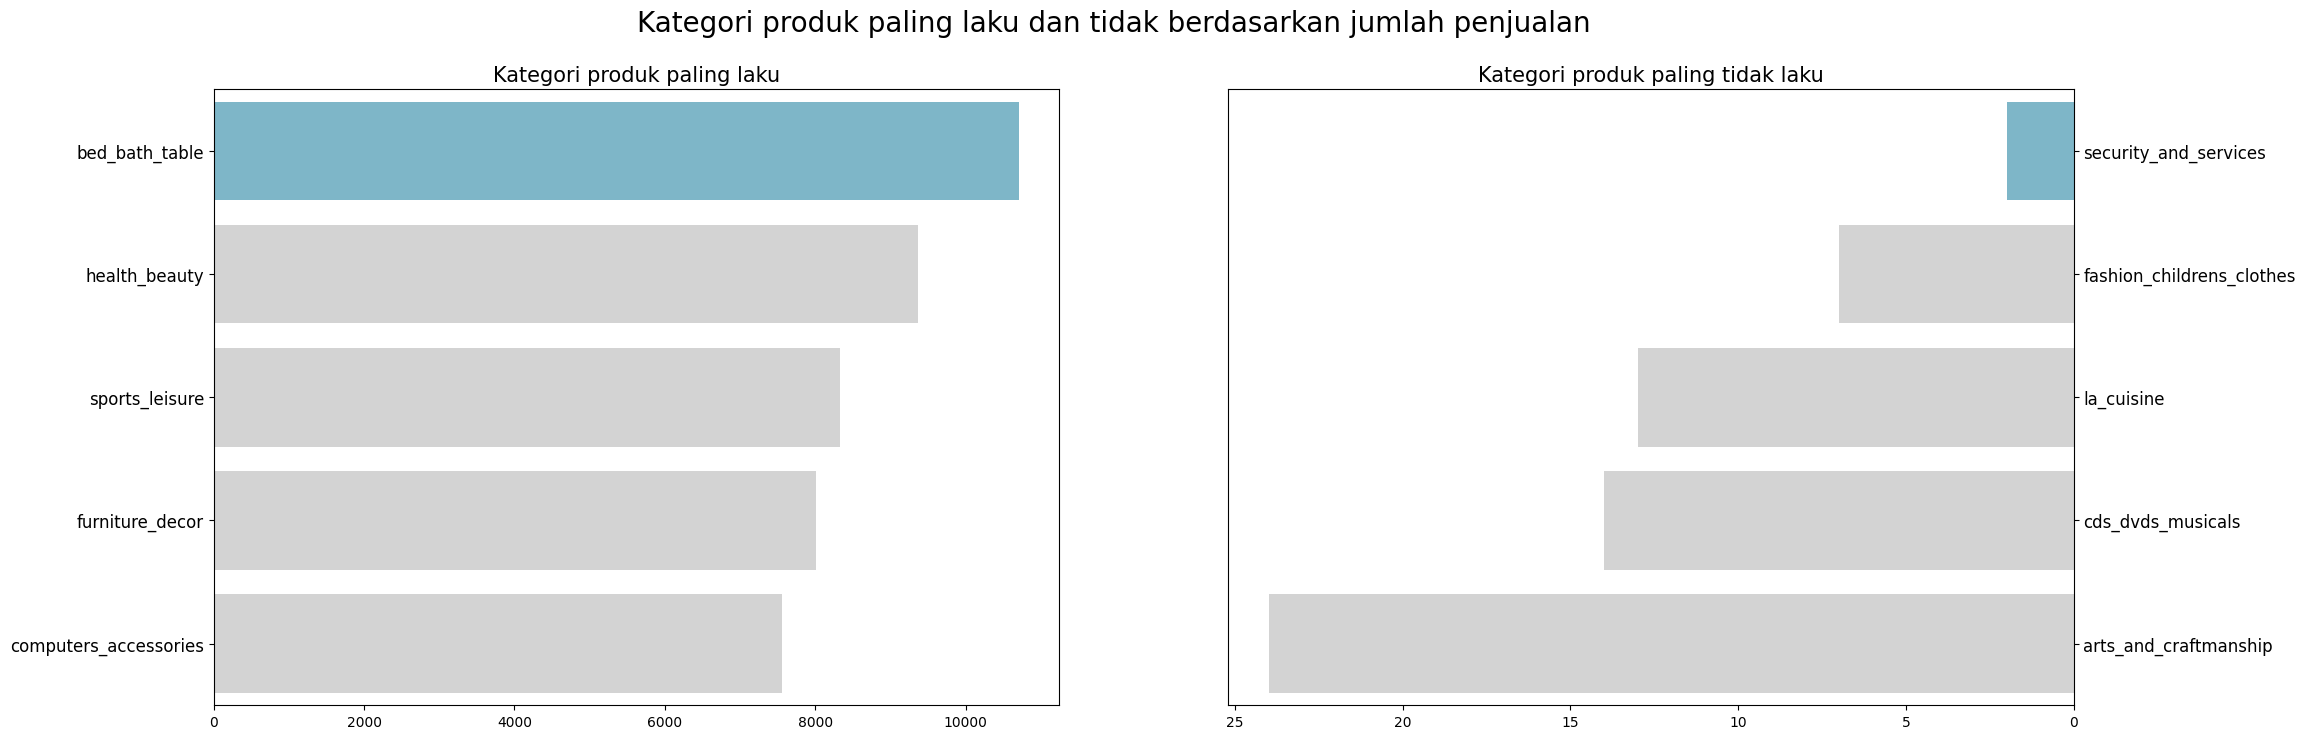

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="jumlah_produk_terjual", y="product_category_name_english", data=product_top, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori produk paling laku", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="jumlah_produk_terjual", y="product_category_name_english", data=product_bottom, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori produk paling tidak laku", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori produk paling laku dan tidak berdasarkan jumlah penjualan", fontsize=20)
plt.show()


**Insight**
- 5 kategori produk paling laku adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories
- 5 kategori produk paling tidak laku adalah security_and_services, fashion_children_clothes, la_cuisine, cds_dvds_musicals, dan arts_and_craftmanship

### Pertanyaan 2: Berapa banyak pesanan yang pengirimannya terlambat? Apakah keterlambatan pengiriman memengaruhi review_score yang diberikan oleh pelanggan?

C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\1028896768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\1028896768.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


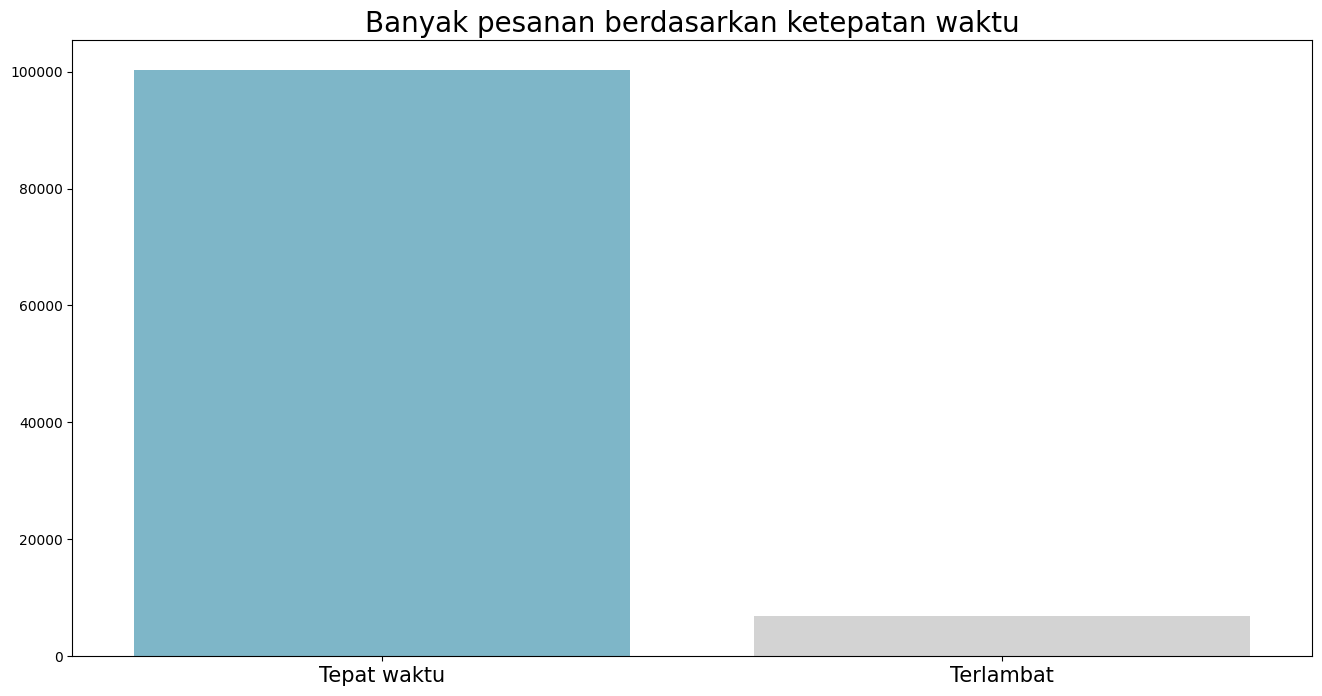

In [158]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(
    y="jumlah_pesanan",
    x="ketepatan_waktu",
    data=order_plot,
    palette=colors,
    ax=ax
)
ax.set_title("Banyak pesanan berdasarkan ketepatan waktu", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

plt.show()

C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\1077371418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\zidan raihandi\AppData\Local\Temp\ipykernel_20048\1077371418.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


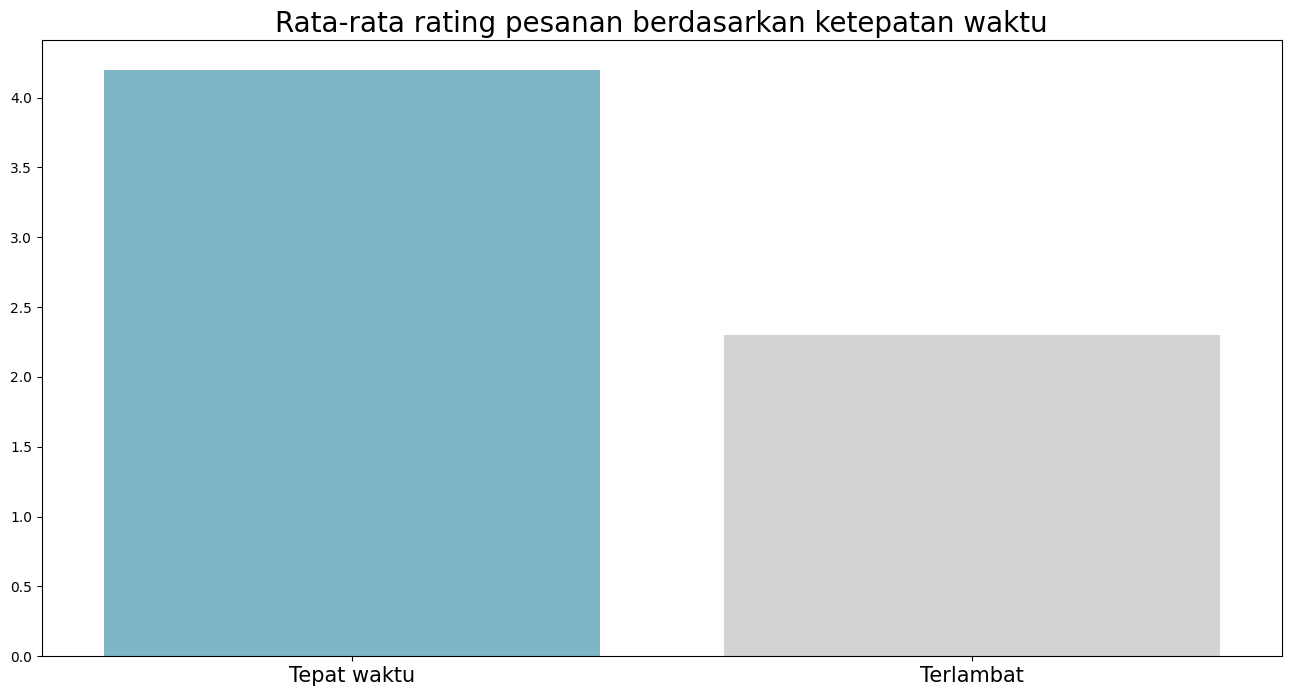

In [159]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(
    y="rata_rata_rating",
    x="ketepatan_waktu",
    data=order_mean_plot,
    palette=colors,
    ax=ax
)
ax.set_title("Rata-rata rating pesanan berdasarkan ketepatan waktu", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

plt.show()

**Insight:**
- Dari grafik di atas, dapat diketahui bahwa pesanan yang pengirimannya terlambat jumlahnya jauh dibawah 20000 pesanan. Sedangkan pesanan yang pengirimannya tepat waktu jumlahnya mencapai 100000 pesanan
- Rata-rata rating pesanan yang pengirimannya tepat waktu yaitu di atas 4, sedangkan rata-rata rating pesanan yang pengirimannya terlambat yaitu kurang dari 2.5
- Terbukti bahwa ketepatan waktu dalam pengiriman pesanan sangat mempengaruhi rating atau review_score yang diberikan oleh pelanggan

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari analisis data yang telah dilakukan, terdapat 5 kategori produk yang paling laku. Peringkat pertama kategori produk yang paling laku adalah bed_bath_table dengan 10709 produk terjual. Peringkat kedua yaitu Health_beauty dengan 9367 produk yang terjual. Peringkat ketga yaitu sport_leisure dengan 8325 produk terjual. Peringkat keempat yaitu furniture_decor dengan 8012 produk terjual. Peringkat kelima yaitu computers_accessories dengan 7557 produk terjual. Sebaliknya, terdapat 5 kategori produk yang paling tidak laku. Peringkat pertama kategori produk yang paling tidak laku adalah security_and_services dengan 2 produk yang terjual. Peringkat kedua yaitu fashion_childrens_clothes dengan 7 produk terjual. Peringkat ketiga yaitu la_cuisine dengan 13 produk terjual. Peringkat keempat yaitu cds_dvds_musicais dengan 14 produk terjual. Peringkat kelima yaitu arts_and_craftmanship dengan 24 produk terjual. Dari hasil analisis tersebut, dapat dibuat keputusan bisnis untuk meningkatkan pendapatan. Keputusan bisnis yang dapat diambil adalah dengan memperbanyak penjualan produk yang termasuk ke dalam kategori produk paling laku.
- Dengan analisis data di atas, terdapat informasi penting yang dapat digunakan untuk pengambilan keputusan bisnis. Informasi penting diantaranya adalah terdapat 6925 pesanan yang pengirimannya terlambat dibanding dengan pesanan yang pengirimannya tepat waktu yaitu 100345 pesanan. Selanjutnya, 6925 pesanan yang pengirimannya terlambat memiliki rata-rata rating/review_score yaitu 2.3 dibanding dengan 100345 pesanan yang memiliki rata-rata rating 4.2 . Hal ini menunjukkan bahwa terdapat pengaruh yang sangat besar dari ketepatan waktu pengiriman dengan rating yang diberikan pelanggan. Pesanan yang pengirimannya terlambat cenderung memiliki rating yang lebih kecil dibanding pesanan yang pengirimannya tepat waktu. Informasi ini dapat digunakan untuk membuat keputusan bisnis, misalnya dengan membuat sistem pengiriman yang lebih efektif agar tidak ada pesanan yang terlambat sampai ke pelanggan

In [160]:
products_order_items_df.to_csv("all_df.csv", index=False)